## Import Modules

In [1]:
%pip install -q librosa pandas numpy seaborn matplotlib IPython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00


In [5]:
%pip install -q kaggle

In [6]:
%pip install kagglehub

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")

print("Path to dataset files:", path)

100%|██████████| 428M/428M [00:06<00:00, 65.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [9]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [10]:
len(paths)

2800

In [15]:
paths[:5]

['/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_lot_ps.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dog_ps.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_mood_ps.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_nice_ps.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_home_ps.wav']

In [18]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [19]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps
1,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps
2,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps
3,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps
4,/root/.cache/kagglehub/datasets/ejlok1/toronto...,ps


In [20]:
df['label'].value_counts()

,count
label,
ps,400
fear,400
happy,400
angry,400
disgust,400
sad,400
neutral,400


## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

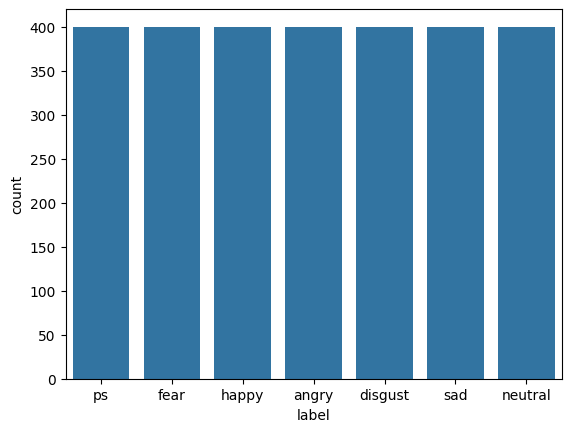

In [21]:
sns.countplot(data=df, x='label')

In [22]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

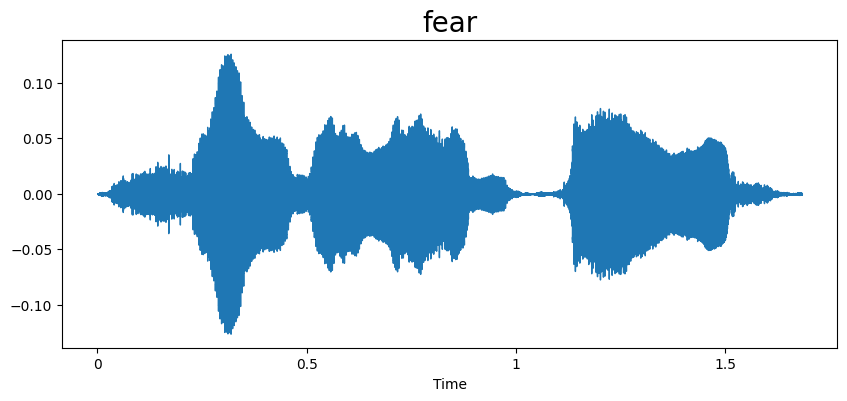

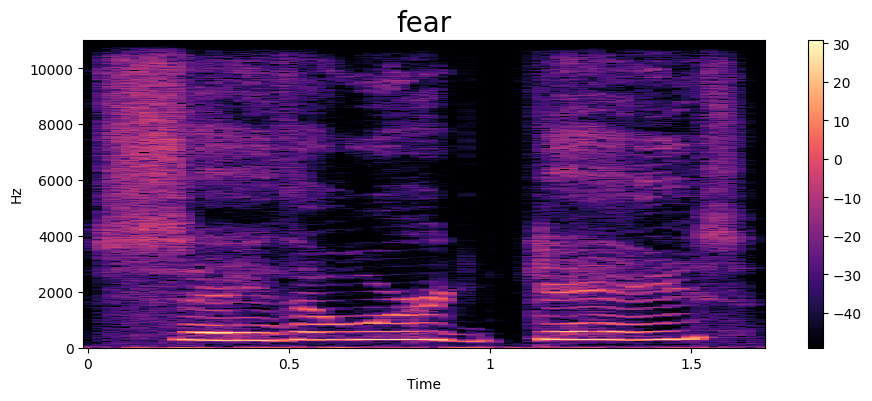

In [24]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[10]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

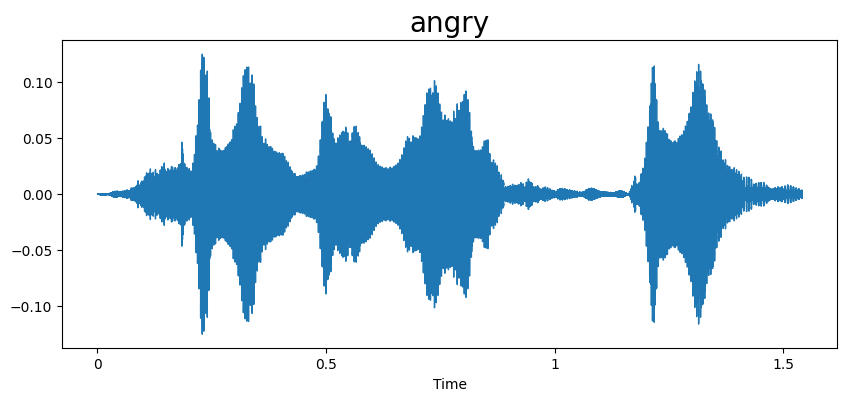

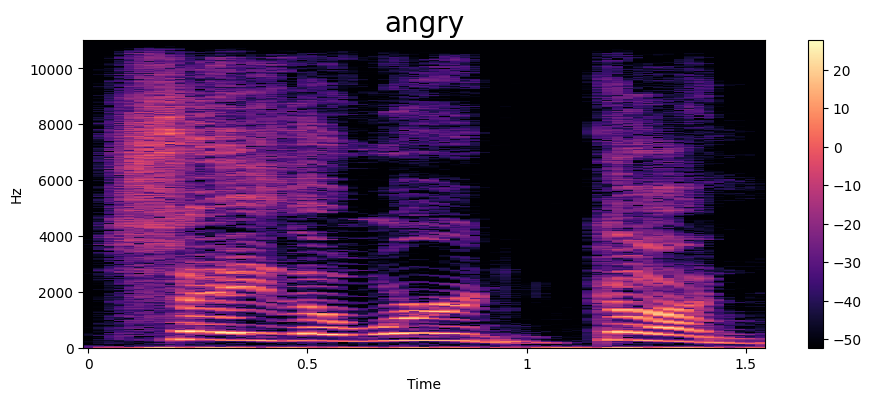

In [25]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[51]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

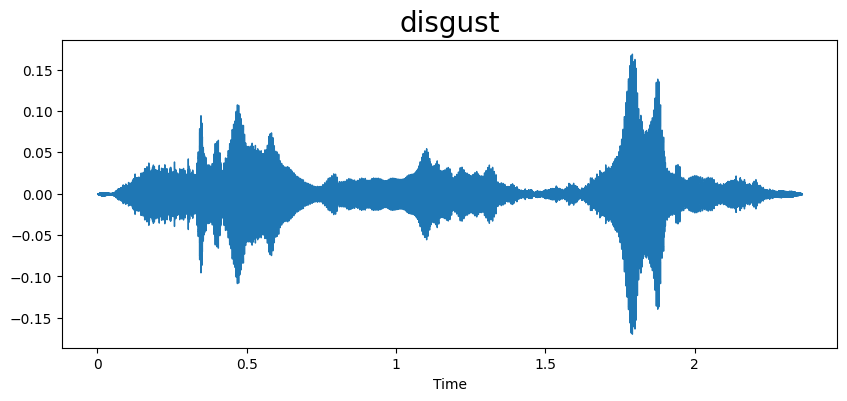

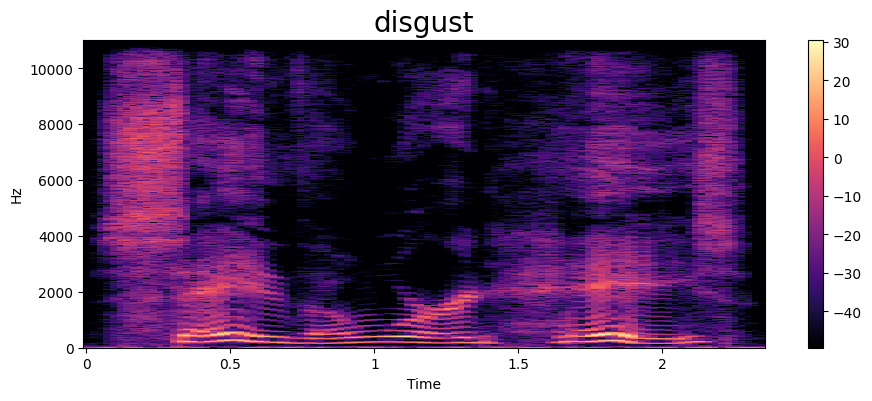

In [27]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[5]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

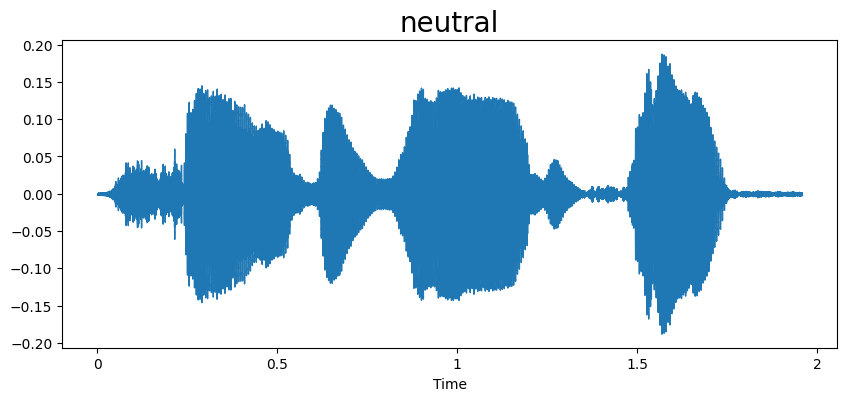

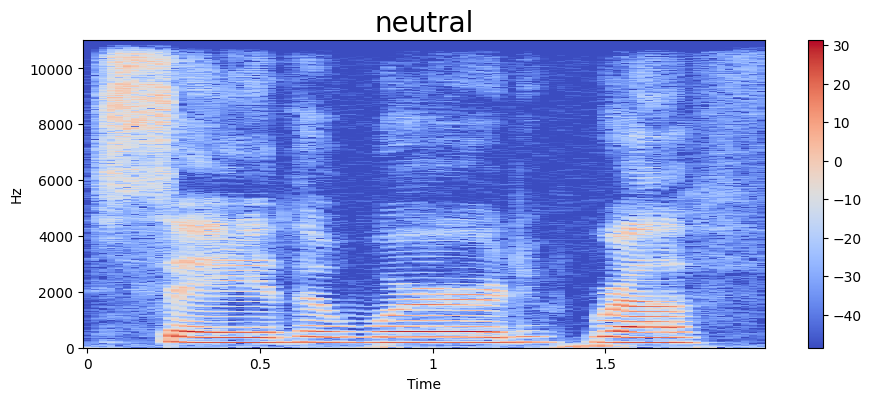

In [28]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

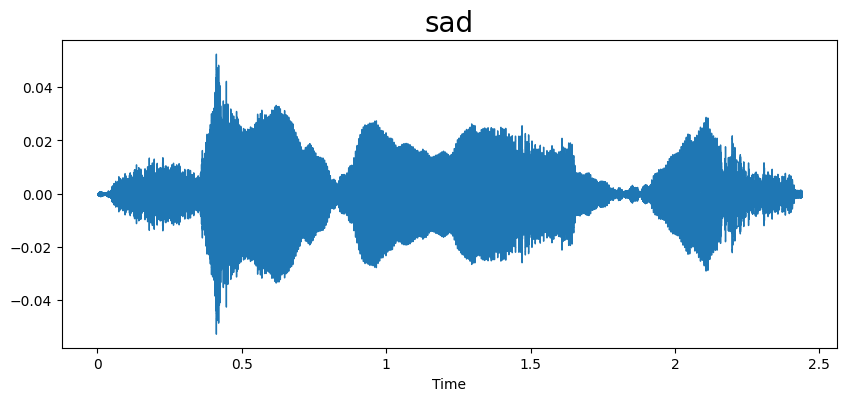

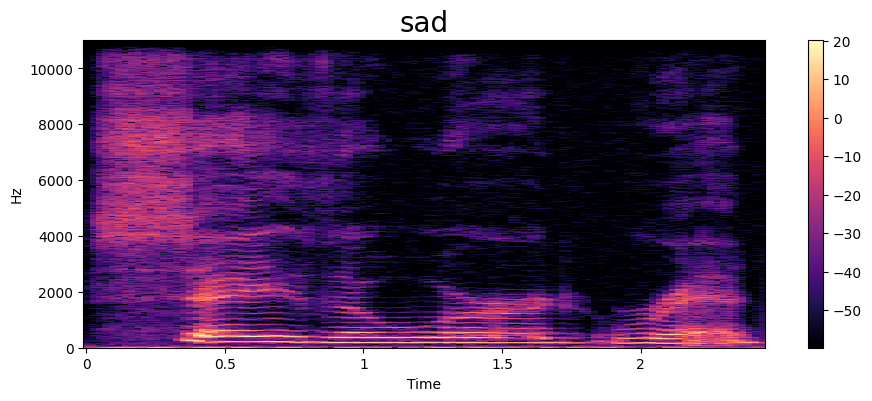

In [29]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

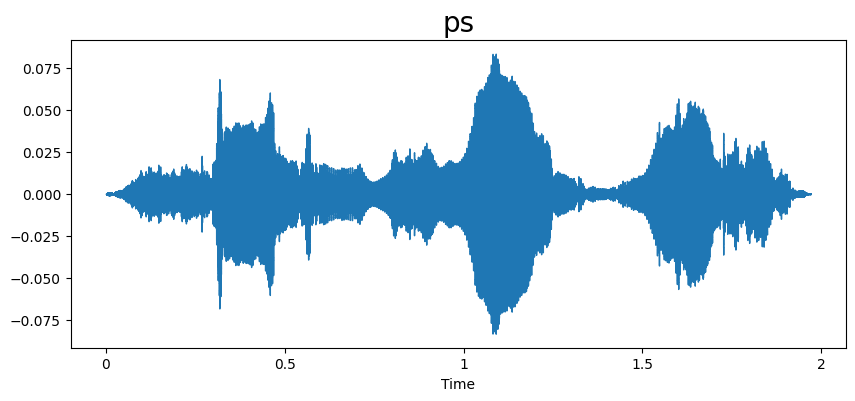

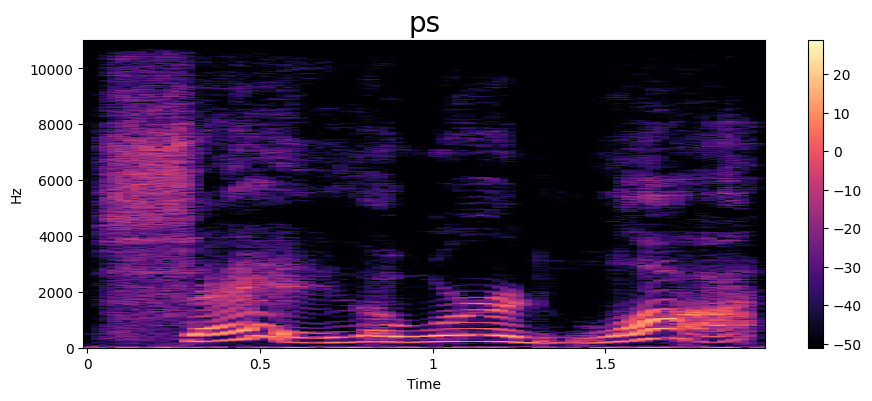

In [30]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

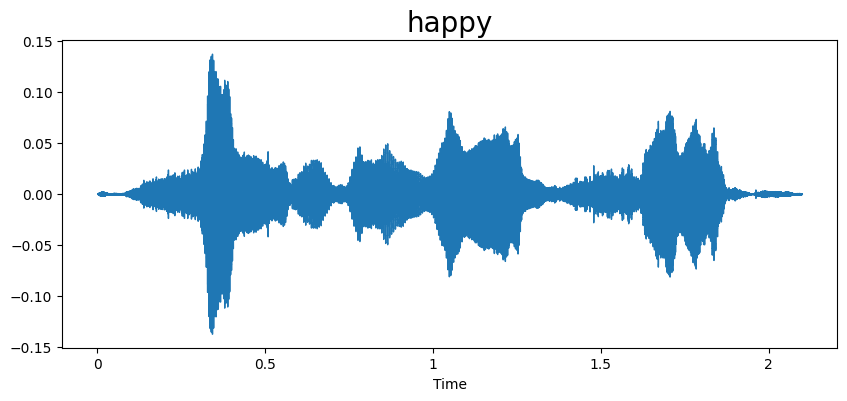

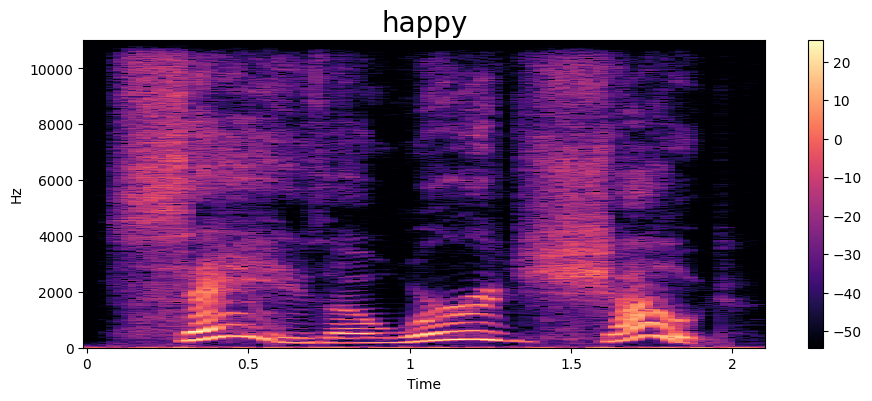

In [32]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[50]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [33]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [35]:
extract_mfcc(df['speech'][0])

array([-499.28534  ,  131.38051  ,   14.61484  ,   -8.505296 ,
         -3.913761 ,    7.2382936,  -20.690502 ,   -0.5265068,
        -22.795649 ,   -8.097553 ,   -6.1475153,   -8.874653 ,
         -3.957349 ,   -3.3302894,   -2.387137 ,    2.6262727,
          1.031096 ,    6.3330736,    4.1090775,   -4.995784 ,
          2.07171  ,   -5.687704 ,    1.0357451,    4.888444 ,
         -5.0227365,    3.3294353,   -2.7093487,    3.9496117,
          5.2249904,    5.9597454,    8.950111 ,   12.906098 ,
         13.478798 ,    8.936478 ,   11.260578 ,   11.206078 ,
         10.414725 ,   10.877378 ,    7.2220974,    4.743988 ],
      dtype=float32)

In [36]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [37]:
X_mfcc

,speech
0,"[-499.28534, 131.38051, 14.61484, -8.505296, -..."
1,"[-441.33182, 113.11722, 17.325127, -13.18025, ..."
2,"[-434.06976, 111.498955, 41.991444, -5.9684324..."
3,"[-414.95715, 92.14921, 20.402058, -1.9017227, ..."
4,"[-489.7352, 123.720634, 22.084352, 8.003033, -..."
...,...
2795,"[-455.739, 106.42544, 7.565088, 14.144337, -29..."
2796,"[-424.51425, 95.32485, -1.6507325, 37.644062, ..."
2797,"[-409.6209, 105.88283, -21.932735, 8.138542, -..."
2798,"[-453.90457, 103.89699, -0.025447933, 15.61161..."


In [38]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [39]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [40]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [41]:
y = y.toarray()

In [42]:
y.shape

(2800, 7)

In [98]:
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

# Get the class labels
labels = enc.categories_[0]
print("Emotion Classes:", labels)


Emotion Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'ps' 'sad']


## Create the LSTM Model

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.3780 - loss: 1.5732 - val_accuracy: 0.6286 - val_loss: 0.9269
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7654 - loss: 0.6049 - val_accuracy: 0.8696 - val_loss: 0.4157
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9010 - loss: 0.2835 - val_accuracy: 0.8518 - val_loss: 0.4247
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9338 - loss: 0.1934 - val_accuracy: 0.5911 - val_loss: 1.1511
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9430 - loss: 0.1875 - val_accuracy: 0.9482 - val_loss: 0.1546
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9450 - loss: 0.1797 - val_accuracy: 0.7429 - val_loss: 0.9842
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9560 - loss: 0.1203 - val_accuracy: 0.7464 - val_loss: 0.7909
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9478 - loss: 0.1515 - val_accuracy: 0.7786 - val_l

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

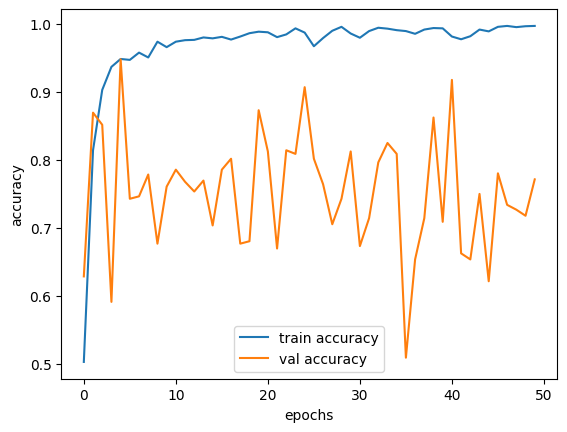

In [45]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

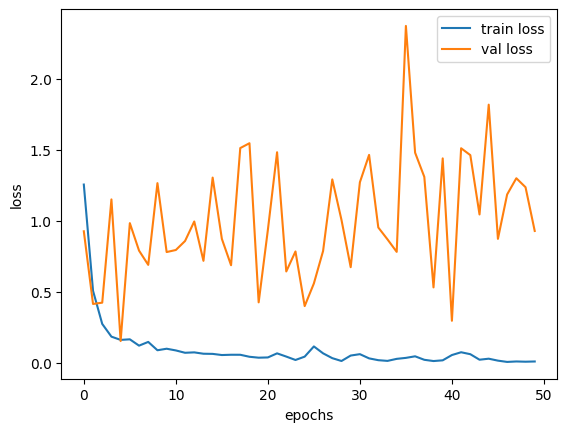

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# **Saving the model**

In [49]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [50]:
model.save('/content/drive/MyDrive/speech_model.keras')


# Loading and Testing the model

In [94]:
from keras.models import load_model

# ✅ Load using proper format
model = load_model("/content/drive/MyDrive/speech_model.keras")

# Now run:
# pred = model.predict(input_data)


In [99]:
import numpy as np
import librosa

def extract_mfcc_avg(filepath):
    y, sr = librosa.load(filepath, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # (40, T)
    mfcc_avg = np.mean(mfcc, axis=1)                    # (40,)
    mfcc_avg = mfcc_avg.astype(np.float32)
    return np.reshape(mfcc_avg, (1, 40, 1))              # (1, 40, 1)


In [107]:
input_data = extract_mfcc_avg("/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_happy/OAF_dip_happy.wav")

print("Input shape:", input_data.shape)  # should be (1, 40, 1)
print("Input dtype:", input_data.dtype)  # should be float32

# Predict
pred = model.predict(input_data)

# Emotion labels
emotion_labels = ['angry' ,'disgust', 'fear' ,'happy', 'neutral', 'ps', 'sad']
# emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
predicted_label = emotion_labels[np.argmax(pred)]
print("Predicted emotion:", predicted_label)


Input shape: (1, 40, 1)
Input dtype: float32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted emotion: happy


In [88]:
import numpy as np
import librosa

def extract_mfcc_avg(filepath):
    y, sr = librosa.load(filepath, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # shape: (40, T)
    mfcc_avg = np.mean(mfcc, axis=1)                    # shape: (40,)
    mfcc_avg = mfcc_avg.astype(np.float32)

    # Final shape: (1, 40, 1)
    return mfcc_avg.reshape(1, 40, 1)

# Test it
file_path = "/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Sad/OAF_back_sad.wav"
input_data = extract_mfcc_avg(file_path)

print("✅ Input shape:", input_data.shape)
print("✅ Input type:", type(input_data))


✅ Input shape: (1, 40, 1)
✅ Input type: <class 'numpy.ndarray'>


# saving emotion labels

In [108]:
import pickle

with open('emotion_labels.pkl', 'wb') as f:
    pickle.dump(emotion_labels, f)


In [109]:
with open('emotion_labels.pkl', 'rb') as f:
    emotion_labels = pickle.load(f)


In [110]:
emotion_labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']